In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_csv('Advertising.csv', index_col=0)
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### What are the features?

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

Radio: advertising dollars spent on Radio

Newspaper: advertising dollars spent on Newspaper

#### What is the Target feature?

Sales: sales of a single product in a given market (in thousands of items)

#### What else do we know?

Because the target variable is continuous, this is a regression problem.

There are 200 observations (represented by the rows), and each observation is a single market.

# Visualisation using seaborn library

C:\Users\Aman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


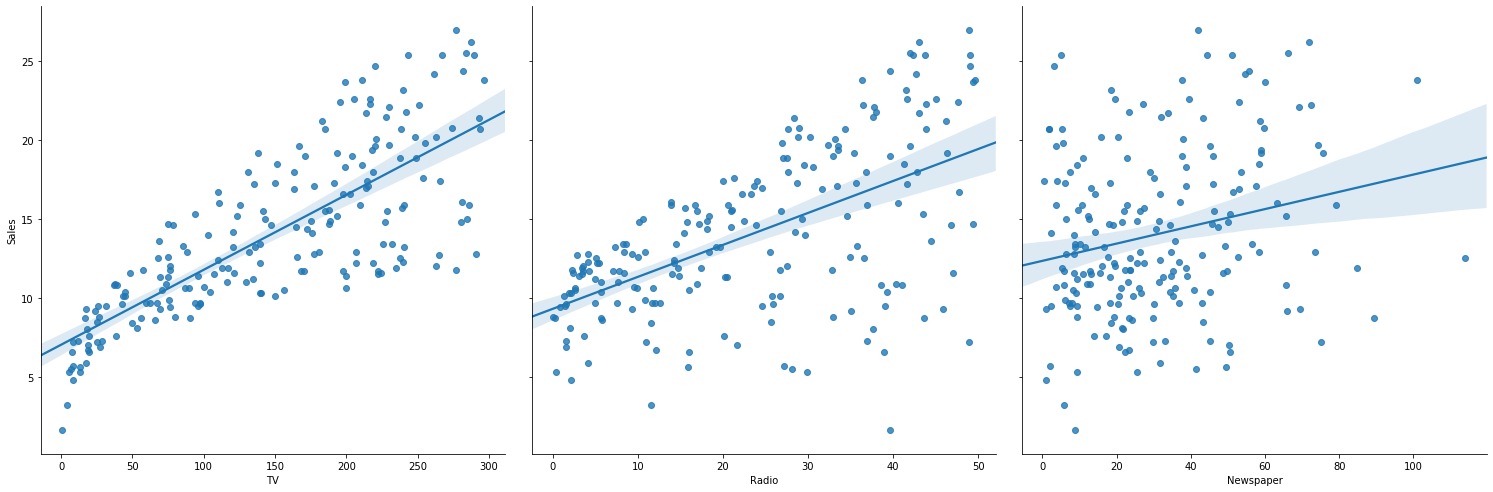

In [206]:
sns.pairplot(data=df,x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, kind='reg')

# Dividing the dataset

In [207]:
X = df.drop('Sales', axis=1).values
y = df['Sales'].values

# Training and Testing split

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# Predictions

## Linear Regression

In [209]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_model.score(X_test,y_test)

0.8927605914615385

In [210]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr_pred)

1.991885551828787

In [211]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, lr_pred)

0.009019523857765045

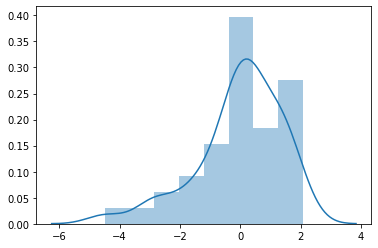

In [231]:
sns.distplot(y_test-lr_pred)

## Nearest Neighbors regression

In [212]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)
kpred = knr.predict(X_test)
knr.score(X_test,y_test)

0.9058281242131081

In [213]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, kpred)

1.7491666666666668

In [214]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, kpred)

0.007402198028755749

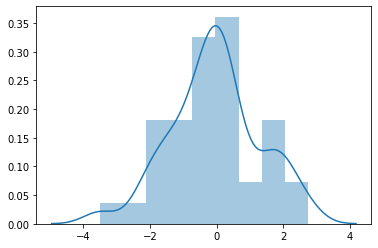

In [230]:
sns.distplot(y_test-kpred)

## Ridge Regression

In [215]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
r_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.8927546108890031

In [216]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, r_pred)

1.991996636141796

In [217]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, r_pred)

0.009019728769670925

C:\Users\Aman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


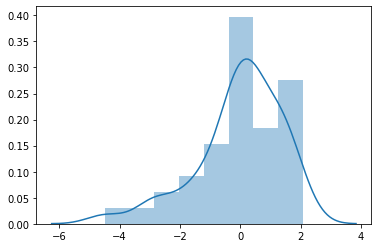

In [229]:
sns.distplot(y_test-r_pred)